In [1]:
import scanpy as sc
import glob

import numpy as np
import pandas as pd
import pickle as pkl

from geosketch import gs
from fbpca import pca

import numpy as np
import pickle

import glob
from tqdm import tqdm

import sys
sys.path.append('/dfs/user/yhr/cross-species/')
from cs_utils import plotly_scatter

import numpy as np
import glob
from tqdm import tqdm


import pickle
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from tqdm import tqdm

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font) 

In [3]:
def find_nearest_neighbors(data, k=1):
    # Calculate the distance between the first row and all other rows
    distances = np.linalg.norm(data - data[0], axis=1)
    
    # Get the indices of the sorted distances
    sorted_indices = np.argsort(distances)
    
    # Exclude the first index (itself)
    nearest_indices = sorted_indices[1:k+1]
    
    return nearest_indices

### Tyser dataset

In [4]:
tyser_dataset = sc.read_h5ad("/dfs/user/yhr/snap/UCE/Tyser_uce_adata.h5ad")
#tabula_dataset = sc.read("/dfs/project/uce/model_output/uce_temp/new_tabula_sapiens_ep_8_sn_251656_nlayers_4_sample_size_1024.h5ad")
#tabula_dataset = sc.read("/dfs/user/yhr/snap/UCE/new_tabula_sapiens_ep_8_sn_251656_nlayers_4_sample_size_1024_uce_adata.h5ad")

## 33 layer
tabula_dataset = sc.read_h5ad("/dfs/project/cross-species/uce/new_tabula_sapiens_ep_8_sn_2013249_nlayers_33_sample_size_1024.h5ad")


In [5]:
tyser_uce = sc.AnnData(tyser_dataset.obsm['X_uce'])
tyser_uce.obs = tyser_dataset.obs
tyser_uce.obs['cell_type'] = tyser_uce.obs['cluster_id']
tyser_uce.obs['dataset'] = 'Tyser'

In [6]:
tyser_uce.obs['cell_type'].unique().tolist()

['Hemogenic Endothelial Progenitors',
 'Endoderm',
 'Advanced Mesoderm',
 'Primitive Streak',
 'ExE Mesoderm',
 'Axial Mesoderm',
 'Erythroblasts',
 'Emergent Mesoderm',
 'Epiblast',
 'Nascent Mesoderm',
 'Non-Neural Ectoderm']

         Falling back to preprocessing with `sc.pp.pca` and default params.


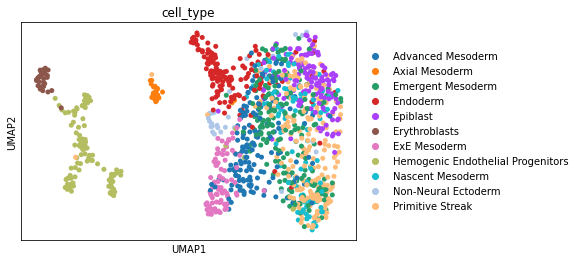

In [172]:
sc.pp.neighbors(tyser_uce)
sc.tl.umap(tyser_uce)
sc.pl.umap(tyser_uce, color='cell_type')

### Measure distances between all cells within each group meso/endo/ecto

In [7]:
cell_origin = {
    "Mesoderm": [
        'naive thymus-derived cd4-positive, alpha-beta t cell',
        'b cell',
        'cd8-positive, alpha-beta t cell',
        'cd4-positive, alpha-beta t cell',
        'plasma cell',
        'innate lymphoid cell',
        'endothelial cell',
        'natural killer cell',
        'erythrocyte',
        'myeloid dendritic cell',
        'cd8-positive, alpha-beta thymocyte',
        'vascular associated smooth muscle cell',
        'neutrophil',
        'vein endothelial cell',
        'myeloid cell',
        'macrophage',
        'regular atrial cardiac myocyte',
        'smooth muscle cell',
        'cardiac endothelial cell',
        'pericyte',
        'mesothelial cell',
        'endothelial cell of artery',
        'non-classical monocyte',
        'classical monocyte',
        'mesenchymal stem cell',
        'skeletal muscle satellite stem cell',
        'tendon cell',
        't cell',
        'capillary endothelial cell',
        'mature nk t cell',
        'regulatory t cell',
        'fast muscle cell',
        'endothelial cell of lymphatic vessel',
        'slow muscle cell',
        'endothelial cell of vascular tree',
        'monocyte',
        'erythroid progenitor cell',
        'hematopoietic stem cell',
        'fibroblast',
        'leukocyte',
        'activated cd4-positive, alpha-beta t cell',
        'mast cell',
        'stromal cell',
        'myofibroblast cell',
        'mesenchymal stem cell of adipose tissue',
        'gamma-delta t cell',
        'erythroid lineage cell',
        'endothelial cell of arteriole',
        'mesenchymal cell',
        'mononuclear phagocyte',
        'endothelial cell of venule',
        't follicular helper cell',
        'fibroblast of cardiac tissue',
        'activated cd8-positive, alpha-beta t cell',
        'glial cell',
        'hepatic stellate cell',
        'ventricular cardiac muscle cell',
        'thymic fibroblast type 1',
        'thymic fibroblast type 2',
        'naive thymus-derived cd8-positive, alpha-beta t cell',
        'hematopoietic precursor cell',
        'myeloid leukocyte',
        'blood vessel smooth muscle cell',
        'muscle cell',
        'hematopoietic cell',
        'myometrial cell',
        'interstitial cell of cajal',
        'connective tissue cell',
        'adventitial cell',
        'basophil',
        'bronchial smooth muscle cell',
        'cd4-positive, alpha-beta thymocyte',
        'colon endothelial cell',
        'colon macrophage',
        'common myeloid progenitor',
        'fat cell',
        'fibroblast of breast',
        'granulocyte',
        'intermediate monocyte',
        'kidney epithelial cell',
        'leydig cell',
        'mural cell',
        'myoepithelial cell',
        'peritubular myoid cell',
        'platelet',
        'plasmacytoid dendritic cell',
        'sebum secreting cell',
        'stromal cell of ovary',
        'theca cell',
        'thymocyte',
        'microglial cell',
        'tissue-resident macrophage',
        'tongue muscle cell',
            'keratocyte',
    'retinal blood vessel endothelial cell',
    'granulosa cell'
    ],
    "Endoderm": [
        'intrahepatic cholangiocyte',
        'respiratory goblet cell',
        'type i pneumocyte',
        'type ii pneumocyte',
        'basal cell',
        'epithelial cell of uterus',
        'epithelial fate stem cell',
        'epithelial cell',
        'salivary gland cell',
        'acinar cell',
        'duct epithelial cell',
        'acinar cell of salivary gland',
        'enterocyte of epithelium of large intestine',
        'paneth cell of colon',
        'intestinal crypt stem cell of colon',
        'tuft cell of colon',
        'bladder urothelial cell',
        'hepatocyte',
        'enterocyte of epithelium proper of small intestine',
        'paneth cell of epithelium of small intestine',
        'intestinal crypt stem cell of small intestine',
        'glandular epithelial cell',
        'enterocyte of epithelium proper of ileum',
        'enterocyte of epithelium proper of duodenum',
        'luminal epithelial cell of mammary gland',
        'serous cell of epithelium of trachea',
        'transit amplifying cell of colon',
        'ovarian surface epithelial cell',
        'pancreatic acinar cell',
        'pancreatic ductal cell',
        'pancreatic a cell',
        'type b pancreatic cell',
        'pancreatic d cell',
        'pancreatic stellate cell',
        'pancreatic pp cell',
        'progenitor cell of mammary luminal epithelium',
        'enteroendocrine cell',
        'enterocyte of epithelium proper of jejunum',
        'alveolar type 2 fibroblast cell',
        'best4+ intestinal epithelial cell, human',
        'ciliated columnar cell of tracheobronchial tree',
        'ciliated epithelial cell',
        'club cell',
        'enterochromaffin-like cell',
        'enteroendocrine cell of small intestine',
        'intestinal tuft cell',
        'large intestine goblet cell',
        'lung ciliated cell',
        'medullary thymic epithelial cell',
        'mucus secreting cell',
        'pulmonary ionocyte',
        'serous cell of epithelium of bronchus',
        'small intestine goblet cell',
        'tracheal goblet cell',
        'transit amplifying cell of small intestine',
        'type l enteroendocrine cell',
     'ionocyte',
            'basal cell of prostate epithelium',
    'luminal cell of prostate epithelium',
    'myo-medullary thymic epithelial cell',
    'neuro-medullary thymic epithelial cell'
        
    ],
    "Ectoderm": [
        'melanocyte',
        'schwann cell',
        'eye photoreceptor cell',
        'enteric neuron',
        'mueller cell',
        'retinal pigment epithelial cell',
        'retinal bipolar neuron',
        'radial glial cell',
        'neuron',
        'retina horizontal cell',
        'supporting cell of vestibular epithelium',
        'vestibular dark cell',
        'retinal ganglion cell',
        'taste receptor cell',
    #],
    #"Non-neural ectoderm":[
        'corneal epithelial cell',
        'conjunctival epithelial cell',
        'stratified squamous epithelial cell'
    ],
    
    "None":[
        'follicle',
        'oocyte',
        'spermatid',
        'spermatocyte',
        'spermatogonium',
        'male germ cell',
    ]
}

In [8]:
def new_donors(ad):
    # add donors and then filter
    ad.obs["donor_num"] = ad.obs["donor"].str.split("TSP", expand=True)[1].astype(int)
    return ad[ad.obs["donor_num"] > 15]

In [9]:
def make_cell_origin_dict(cell_origin):
    cell_origin_dict = {}
    cell_origin_dict.update({key:'Mesoderm' for key in cell_origin['Mesoderm']})
    cell_origin_dict.update({key:'Endoderm' for key in cell_origin['Endoderm']})
    cell_origin_dict.update({key:'Ectoderm' for key in cell_origin['Ectoderm']})
    
    return cell_origin_dict

def get_germ_map(cell_origin_dict, all_cell_types, neighbors):

    germ_map = {}
    germ_map['Mesoderm'] = {}
    germ_map['Endoderm'] = {}
    germ_map['Ectoderm'] = {}

    germ_map_percent = {}
    germ_map_percent['Mesoderm'] = {}
    germ_map_percent['Endoderm'] = {}
    germ_map_percent['Ectoderm'] = {}


    germ_map['Mesoderm'] = {'Mesoderm':0, 'Endoderm':0, 'Ectoderm':0}
    germ_map['Endoderm'] = {'Mesoderm':0, 'Endoderm':0, 'Ectoderm':0}
    germ_map['Ectoderm'] = {'Mesoderm':0, 'Endoderm':0, 'Ectoderm':0}

    for itr, i in enumerate(neighbors):
        try:
            germ_map[cell_origin_dict[all_cell_types[itr]]][cell_origin_dict[all_cell_types[i]]] += 1
        except:
            continue

    for k in germ_map.keys():
        for kk in germ_map[k].keys():
            germ_map_percent[k][kk] = germ_map[k][kk]/sum(germ_map[k].values())
            
    return germ_map, germ_map_percent

def nearest_neighbors(matrix):
    distances = np.linalg.norm(matrix[:, np.newaxis] - matrix, axis=2)
    np.fill_diagonal(distances, np.inf)
    nearest_neighbor_index = np.argmin(distances, axis=1)
    return nearest_neighbor_index

def find_nearest_neighbors(data, k=1):
    # Calculate the distance between the first row and all other rows
    distances = np.linalg.norm(data - data[0], axis=1)
    
    # Get the indices of the sorted distances
    sorted_indices = np.argsort(distances)
    
    # Exclude the first index (itself)
    nearest_indices = sorted_indices[1:k+1]
    
    return nearest_indices

In [10]:
tabula_dataset = new_donors(tabula_dataset)

In [11]:
tabula_uce = sc.AnnData(tabula_dataset.obsm['X_uce'])
tabula_uce.obs = tabula_dataset.obs

In [12]:
tabula_uce_df = pd.DataFrame(tabula_uce.X)
tabula_uce_df['cell_type'] = tabula_dataset.obs['cell_ontology_class'].values
tabula_uce_df_mean = tabula_uce_df.groupby('cell_type').mean()

In [13]:
all_cell_types = tabula_uce_df_mean.index.values

In [14]:
meso_idx = np.where([x in cell_origin['Mesoderm'] for x in np.array(all_cell_types)])[0]
endo_idx = np.where([x in cell_origin['Endoderm'] for x in np.array(all_cell_types)])[0]
ecto_idx = np.where([x in cell_origin['Ectoderm'] for x in np.array(all_cell_types)])[0]

#non_neural_ecto_idx = np.where([x in cell_origin['Non-neural ectoderm'] for x in np.array(all_cell_types)])[0]

In [15]:
#distances = euclidean_distances(tabula_uce_df_mean.values)
neighbors = nearest_neighbors(tabula_uce_df_mean.values)

In [16]:
cell_origin_dict = make_cell_origin_dict(cell_origin)
germ_map, germ_map_percent = get_germ_map(cell_origin_dict, all_cell_types, neighbors)

##pd.DataFrame.from_dict(cell_origin_dict, orient='index').to_csv('cell_origin_dict.csv')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


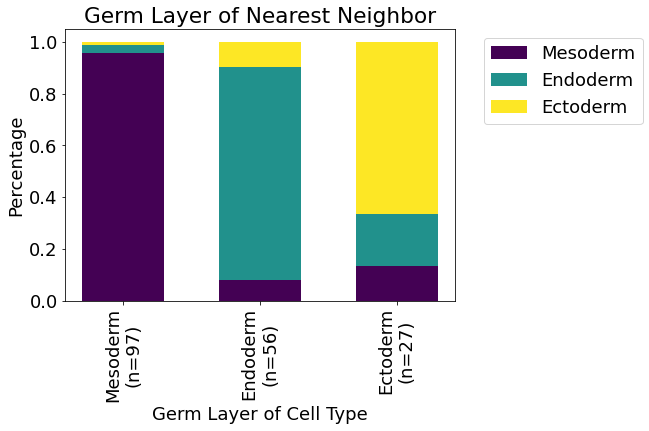

In [17]:
## NEW CODE

import matplotlib.pyplot as plt
import numpy as np

# Your data
labels = list(germ_map_percent.keys())
mesoderm_values = [germ_map_percent[label]['Mesoderm'] for label in labels]
endoderm_values = [germ_map_percent[label]['Endoderm'] for label in labels]
ectoderm_values = [germ_map_percent[label]['Ectoderm'] for label in labels]

width = 0.6  # Bar width
x = np.arange(len(labels))

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, 3))  # You can change the colormap to any other available in Matplotlib

# Create the bar chart
plt.figure(figsize=[7,5])
plt.bar(x, mesoderm_values, width, label='Mesoderm', color=colors[0])
plt.bar(x, endoderm_values, width, label='Endoderm', color=colors[1], bottom=mesoderm_values)
plt.bar(x, ectoderm_values, width, label='Ectoderm', color=colors[2], bottom=np.array(mesoderm_values) + np.array(endoderm_values))

# Customize the plot
plt.xlabel('Germ Layer of Cell Type')
plt.ylabel('Percentage')
plt.title('Germ Layer of Nearest Neighbor')
plt.xticks(x, ['Mesoderm\n(n=97)', 'Endoderm\n(n=56)', 'Ectoderm\n(n=27)'],  rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1.00))

# Show the plot
plt.show()


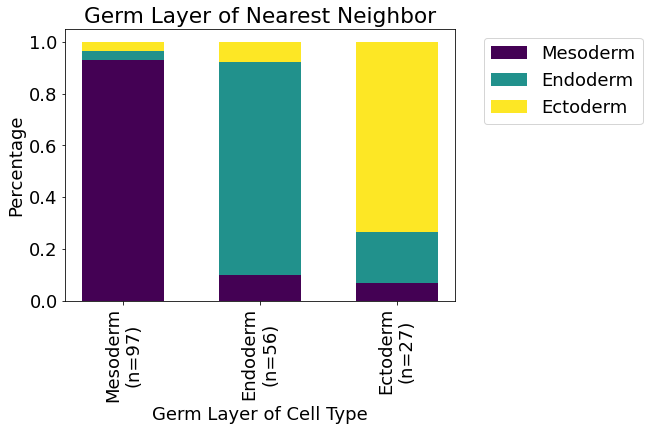

In [459]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
labels = list(germ_map_percent.keys())
mesoderm_values = [germ_map_percent[label]['Mesoderm'] for label in labels]
endoderm_values = [germ_map_percent[label]['Endoderm'] for label in labels]
ectoderm_values = [germ_map_percent[label]['Ectoderm'] for label in labels]

width = 0.6  # Bar width
x = np.arange(len(labels))

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, 3))  # You can change the colormap to any other available in Matplotlib

# Create the bar chart
plt.figure(figsize=[7,5])
plt.bar(x, mesoderm_values, width, label='Mesoderm', color=colors[0])
plt.bar(x, endoderm_values, width, label='Endoderm', color=colors[1], bottom=mesoderm_values)
plt.bar(x, ectoderm_values, width, label='Ectoderm', color=colors[2], bottom=np.array(mesoderm_values) + np.array(endoderm_values))

# Customize the plot
plt.xlabel('Germ Layer of Cell Type')
plt.ylabel('Percentage')
plt.title('Germ Layer of Nearest Neighbor')
plt.xticks(x, ['Mesoderm\n(n=97)', 'Endoderm\n(n=56)', 'Ectoderm\n(n=27)'],  rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1.00))

# Show the plot
plt.show()


In [19]:
germ_map_percent

{'Mesoderm': {'Mesoderm': 0.9555555555555556,
  'Endoderm': 0.03333333333333333,
  'Ectoderm': 0.011111111111111112},
 'Endoderm': {'Mesoderm': 0.0784313725490196,
  'Endoderm': 0.8235294117647058,
  'Ectoderm': 0.09803921568627451},
 'Ectoderm': {'Mesoderm': 0.13333333333333333,
  'Endoderm': 0.2,
  'Ectoderm': 0.6666666666666666}}

### Compute the dot product between:

- stem-cell to meso and stem-cell to other cell type
- stem-cell to endo and stem-cell to other cell type

In [192]:
tyser_uce_df = pd.DataFrame(tyser_uce.X)
tyser_uce_df['cell_type'] = tyser_uce.obs['cell_type'].values
tyser_uce_df_mean = tyser_uce_df.groupby('cell_type').mean()

In [193]:
root_cell = tyser_uce_df_mean.loc['Epiblast'].values

In [194]:
tabula_uce_df_mean_vectors = tabula_uce_df_mean - root_cell
tyser_uce_df_mean_vectors =  tyser_uce_df_mean - root_cell

In [519]:
mesoderm_vec = tyser_uce_df_mean_vectors.loc['ExE Mesoderm'].values
endoderm_vec = tyser_uce_df_mean_vectors.loc['Endoderm'].values
ectoderm_vec = tyser_uce_df_mean_vectors.loc['Non-Neural Ectoderm'].values

In [473]:
def get_angle(a, b):
    cosine_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    angle_rad = np.arccos(cosine_theta)
    return angle_rad

In [474]:
mesoderm_dots = np.dot(tabula_uce_df_mean_vectors.values, mesoderm_vec)
endoderm_dots = np.dot(tabula_uce_df_mean_vectors.values, endoderm_vec)
ectoderm_dots = np.dot(tabula_uce_df_mean_vectors.values, ectoderm_vec)


"""

mesoderm_rads = get_angle(tabula_uce_df_mean_vectors.values, mesoderm_vec)
endoderm_rads = get_angle(tabula_uce_df_mean_vectors.values, endoderm_vec)
ectoderm_rads = get_angle(tabula_uce_df_mean_vectors.values, ectoderm_vec)
"""

'\n\nmesoderm_rads = get_angle(tabula_uce_df_mean_vectors.values, mesoderm_vec)\nendoderm_rads = get_angle(tabula_uce_df_mean_vectors.values, endoderm_vec)\nectoderm_rads = get_angle(tabula_uce_df_mean_vectors.values, ectoderm_vec)\n'

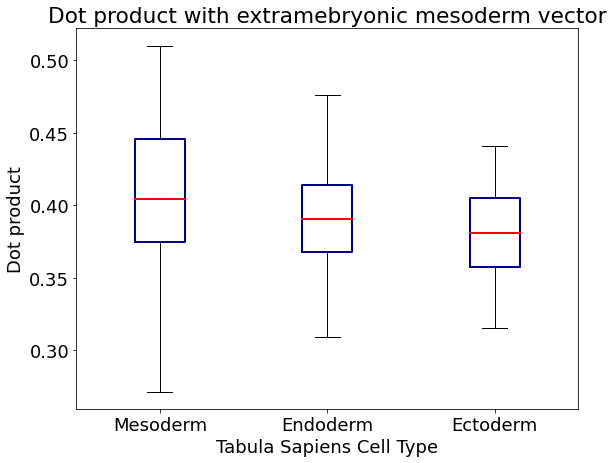

In [439]:
# Boxplot
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')

plt.figure(figsize=[9,7])
bp = plt.boxplot([mesoderm_dots[meso_idx], 
                  mesoderm_dots[endo_idx],
                  mesoderm_dots[ecto_idx]], 
                  showfliers=False,
                  boxprops=boxprops,
                  medianprops=medianprops)

# Set colors for each box
colors = ['pink', 'lightgreen', 'lightblue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_color('darkblue')

# Setting xticklabels
plt.xticks([1, 2, 3], ['Mesoderm', 'Endoderm', 'Ectoderm'])
plt.title('Dot product with extramebryonic mesoderm vector')
plt.xlabel('Tabula Sapiens Cell Type')
plt.ylabel('Dot product')

plt.show()

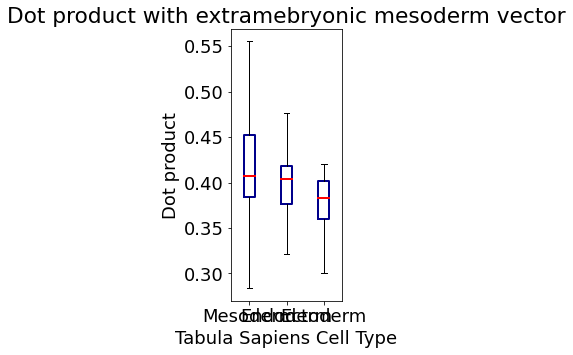

In [415]:
# Boxplot
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')

plt.figure(figsize=[2,5])
bp = plt.boxplot([mesoderm_dots[meso_idx], 
                  mesoderm_dots[endo_idx],
                  mesoderm_dots[ecto_idx]], 
                  showfliers=False,
                  boxprops=boxprops,
                  medianprops=medianprops)

# Set colors for each box
colors = ['pink', 'lightgreen', 'lightblue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_color('darkblue')

# Setting xticklabels
plt.xticks([1, 2, 3], ['Mesoderm', 'Endoderm', 'Ectoderm'])
plt.title('Dot product with extramebryonic mesoderm vector')
plt.xlabel('Tabula Sapiens Cell Type')
plt.ylabel('Dot product')

plt.show()

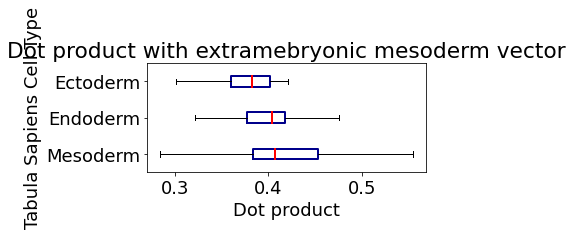

In [416]:
# Boxplot properties
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')

plt.figure(figsize=[5, 2])  # Adjusted figure size for better view
bp = plt.boxplot([mesoderm_dots[meso_idx], 
                  mesoderm_dots[endo_idx],
                  mesoderm_dots[ecto_idx]], 
                  vert=False,  # Horizontal boxes
                  showfliers=False,
                  boxprops=boxprops,
                  medianprops=medianprops)

# Set colors for each box
colors = ['pink', 'lightgreen', 'lightblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_color('darkblue')

# Setting yticklabels instead of xticklabels
plt.yticks([1, 2, 3], ['Mesoderm', 'Endoderm', 'Ectoderm'])
plt.title('Dot product with extramebryonic mesoderm vector')
plt.ylabel('Tabula Sapiens Cell Type')  # Swapped roles of xlabel and ylabel
plt.xlabel('Dot product')  # Swapped roles of xlabel and ylabel

plt.show()


In [423]:
from scipy.stats import ttest_ind

In [424]:
ttest_ind(mesoderm_dots[endo_idx], mesoderm_dots[meso_idx])

Ttest_indResult(statistic=0.11705761157451774, pvalue=0.9069775051993868)

(array([0.40089948, 0.        , 0.40089946, 0.        , 0.80179868,
        0.60134935, 5.81304045, 6.01349354, 4.00899342, 1.00224892]),
 array([0.03028272, 0.08279621, 0.13530971, 0.1878232 , 0.24033669,
        0.2928502 , 0.34536368, 0.3978772 , 0.45039067, 0.5029042 ,
        0.55541766], dtype=float32),
 <BarContainer object of 10 artists>)

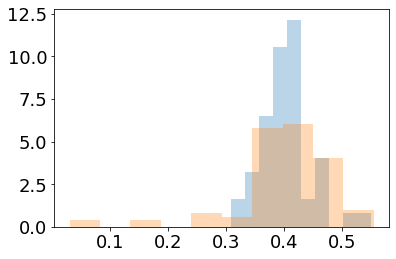

In [421]:
plt.hist(mesoderm_dots[endo_idx], alpha=0.3, bins=10, density=True)
plt.hist(mesoderm_dots[meso_idx], alpha=0.3, bins=10, density=True)

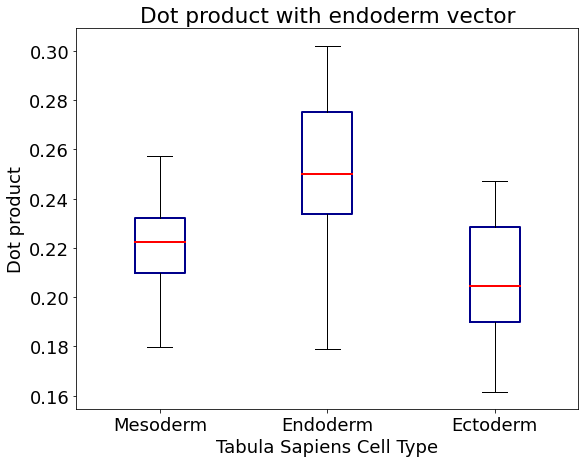

In [438]:
# Boxplot
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')

plt.figure(figsize=[9,7])
bp = plt.boxplot([endoderm_dots[meso_idx], 
                  endoderm_dots[endo_idx],
                  endoderm_dots[ecto_idx]], 
                  showfliers=False,
                  boxprops=boxprops,
                  medianprops=medianprops)

# Set colors for each box
colors = ['pink', 'lightgreen', 'lightblue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_color('darkblue')

# Setting xticklabels
plt.xticks([1, 2, 3], ['Mesoderm', 'Endoderm', 'Ectoderm'])
plt.title('Dot product with endoderm vector')
plt.xlabel('Tabula Sapiens Cell Type')
plt.ylabel('Dot product')

plt.show()

In [394]:
non_nerual_ecto_idx

array([], dtype=int64)

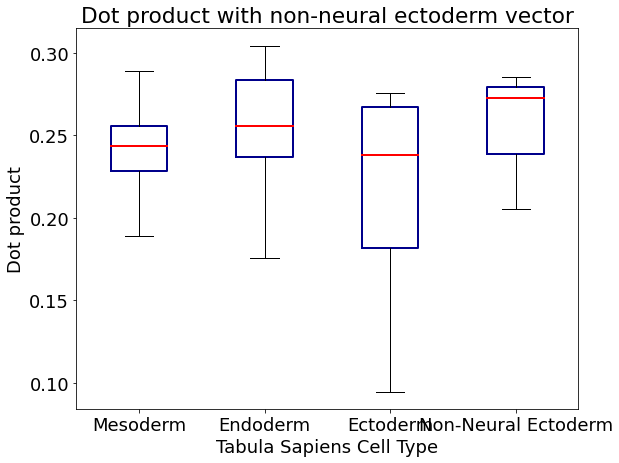

In [403]:
# Boxplot
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')

plt.figure(figsize=[9,7])
bp = plt.boxplot([ectoderm_dots[meso_idx], 
                  ectoderm_dots[endo_idx],
                  ectoderm_dots[ecto_idx],
                  ectoderm_dots[non_neural_ecto_idx]], 
                  showfliers=False,
                  boxprops=boxprops,
                  medianprops=medianprops)

# Set colors for each box
colors = ['pink', 'lightgreen', 'lightblue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_color('darkblue')

# Setting xticklabels
plt.xticks([1, 2, 3, 4], ['Mesoderm', 'Endoderm', 'Ectoderm', 'Non-Neural Ectoderm'])
plt.title('Dot product with non-neural ectoderm vector')
plt.xlabel('Tabula Sapiens Cell Type')
plt.ylabel('Dot product')

plt.show()

### Significance testing

In [230]:
## First create the random sampled cell_origin lists

def get_random_cell_origin(all_cell_types, cell_origin):
    random_dict = {}
    reamining_samples = set(all_cell_types.tolist())
    for germ_layer in list(cell_origin.keys()):
        num_sample = len(cell_origin[germ_layer])
        random_dict[germ_layer] = np.random.choice(list(reamining_samples), num_sample,
                                                  replace=False)
        reamining_samples = reamining_samples.difference(set(random_dict[germ_layer]))
    assert len(set(random_dict['Mesoderm']).intersection(set(random_dict['Endoderm'])))==0
    return random_dict

In [226]:
cell_origin['Mesoderm'] = list(set(cell_origin['Mesoderm']).intersection(set(all_cell_types)))
cell_origin['Endoderm'] = list(set(cell_origin['Endoderm']).intersection(set(all_cell_types)))
cell_origin['Ectoderm'] = list(set(cell_origin['Ectoderm']).intersection(set(all_cell_types)))


In [231]:
random_cell_origins = []
for itr in range(1000):
    random_cell_origins.append(get_random_cell_origin(all_cell_types, 
                                                     cell_origin))

In [232]:
null_dist = {}
null_dist['Mesoderm'] = []
null_dist['Endoderm'] = []
null_dist['Ectoderm'] = []

for random_cell_origin in random_cell_origins:
    random_cell_origin_dict = make_cell_origin_dict(random_cell_origin)
    random_germ_map, random_germ_map_percent = get_germ_map(random_cell_origin_dict, 
                                                            all_cell_types, neighbors)
    
    null_dist['Mesoderm'].append(random_germ_map_percent['Mesoderm']['Mesoderm'])
    null_dist['Endoderm'].append(random_germ_map_percent['Endoderm']['Endoderm'])
    null_dist['Ectoderm'].append(random_germ_map_percent['Ectoderm']['Ectoderm'])

0.0
0.0
0.0


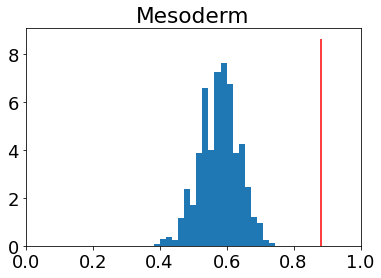

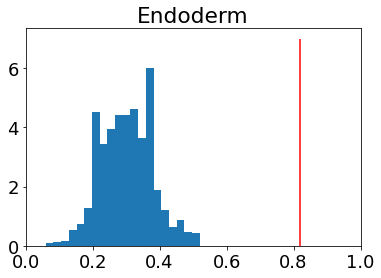

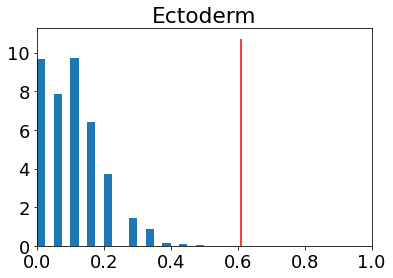

In [233]:
for germ_layer in list(random_cell_origin.keys()):
    plt.figure()
    hist_ = plt.hist(null_dist[germ_layer], density=True, bins=20)
    
    t_stat, p_value = ttest_1samp(null_dist[germ_layer], 
                                 germ_map_percent[germ_layer][germ_layer])
    plt.title(germ_layer)
    plt.xlim([0,1])
    
    plt.vlines(x=germ_map_percent[germ_layer][germ_layer], 
               ymin=0, ymax=hist_[0].max()+1, color='red')
    
    print(p_value)

In [234]:
random_meso_idxs = []
random_endo_idxs = []
random_ecto_idxs = []

random_meso_dot_means = []
random_endo_dot_means = []
random_ecto_dot_means = []

for random_cell_origin in random_cell_origins:
    random_meso_idx = np.where([x in random_cell_origin['Mesoderm'] for x in np.array(all_cell_types)])[0]
    random_endo_idx = np.where([x in random_cell_origin['Endoderm'] for x in np.array(all_cell_types)])[0]
    random_ecto_idx = np.where([x in random_cell_origin['Ectoderm'] for x in np.array(all_cell_types)])[0]
    
    random_meso_idxs.append(random_meso_idx.tolist())   
    random_endo_idxs.append(random_endo_idx.tolist())   
    random_ecto_idxs.append(random_ecto_idx.tolist())   
    
    random_meso_dot_means.append(np.mean(mesoderm_dots[random_meso_idx]))
    random_endo_dot_means.append(np.mean(endoderm_dots[random_endo_idx]))
    random_ecto_dot_means.append(np.mean(ectoderm_dots[random_ecto_idx]))

1.7889111132257416e-175


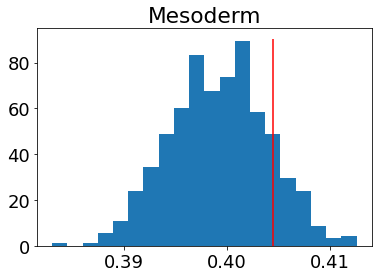

In [235]:
plt.figure()
germ_layer = 'Mesoderm'


hist_ = plt.hist(random_meso_dot_means, density=True, bins=20)

t_stat, p_value = ttest_1samp(random_meso_dot_means, np.mean(mesoderm_dots[meso_idx]))
plt.title(germ_layer)

plt.vlines(x=np.mean(mesoderm_dots[meso_idx]), ymin=0, ymax=hist_[0].max()+1, color='red')

print(p_value)

0.0


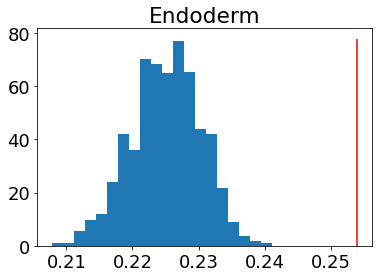

In [236]:
plt.figure()
germ_layer = 'Endoderm'


hist_ = plt.hist(random_endo_dot_means, density=True, bins=20)

t_stat, p_value = ttest_1samp(random_endo_dot_means, np.mean(endoderm_dots[endo_idx]))
plt.title(germ_layer)

plt.vlines(x=np.mean(endoderm_dots[endo_idx]), ymin=0, ymax=hist_[0].max()+1, color='red')

print(p_value)

2.922501433735944e-141


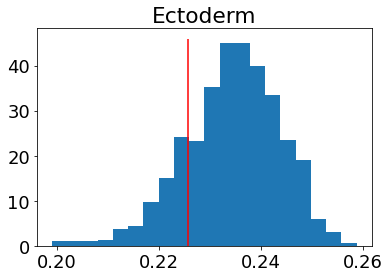

In [181]:
plt.figure()
germ_layer = 'Ectoderm'


hist_ = plt.hist(random_ecto_dot_means, density=True, bins=20)

t_stat, p_value = ttest_1samp(random_ecto_dot_means, np.mean(ectoderm_dots[ecto_idx]))
plt.title(germ_layer)

plt.vlines(x=np.mean(ectoderm_dots[ecto_idx]), ymin=0, ymax=hist_[0].max()+1, color='red')

print(p_value)

In [ ]:
find_nearest_neighbors(tabula_uce_df_mean.values)

In [50]:
tabula_dataset[tabula_dataset.obs['cell_ontology_class'].isin(cell_origin['Mesoderm'])]

View of AnnData object with n_obs × n_vars = 877651 × 19567
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'sample', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'n_genes'
    var: 'ensembl_id', 'gene_symbol', 'genome', 'mt', 'ercc', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'n_cells'
    obsm: 'X_uce'

In [ ]:
tabula_dataset[tabula_dataset.obs['cell_ontology_class'].isin(cell_origin['Mesoderm'])]

### Measure distance between each cell in each subgroup and corresponding parent meso/endo/ecto

### Dot product analysis

In [27]:
all_cell_types = tabula_dataset.obs['cell_ontology_class'].unique().tolist()

### Distances

In [ ]:
def get_distances(idx1, idx2, distances):
    
    all_dists = []
    for i in idx1:
        for j in idx2:
            all_dists.append(distances[i,j])
            
    return all_dists

dists = {}
dists['meso_meso'] = get_distances(meso_idx, meso_idx, distances)
dists['meso_endo'] = get_distances(meso_idx, endo_idx, distances)
dists['meso_ecto'] = get_distances(meso_idx, ecto_idx, distances)
dists['endo_endo'] = get_distances(endo_idx, endo_idx, distances)
dists['ecto_endo'] = get_distances(ecto_idx, endo_idx, distances)
dists['ecto_ecto'] = get_distances(ecto_idx, ecto_idx, distances)

import matplotlib.pyplot as plt

_ = plt.boxplot([dists['endo_endo'], dists['meso_endo'],  
                 dists['ecto_endo']], showfliers=False)

### Train a mesoderm, endoderm, ectoderm classifier

In [20]:
tabula_uce_df_mean = tabula_uce_df_mean.drop(cell_origin['None'])

In [21]:
import sys
sys.path.append('../')

In [22]:
from sklearn.linear_model import LogisticRegression
from cell_type_map_gpt import cell_type_mapping

In [23]:
cell_type_mapping['naive thymus-derived cd8-positive, alpha-beta t cell'] = 'T cell'
cell_type_mapping['naive thymus-derived cd4-positive, alpha-beta t cell'] = 'T cell'

cell_type_mapping['activated cd4-positive, alpha-beta t cell'] = 'T cell'
cell_type_mapping['activated cd8-positive, alpha-beta t cell'] = 'T cell'
cell_type_mapping['blood vessel smooth muscle cell'] = 'muscle cell'
cell_type_mapping['cd4-positive, alpha-beta thymocyte'] = 'thymocyte'
cell_type_mapping['cd8-positive, alpha-beta thymocyte'] = 'thymocyte'
cell_type_mapping['colon endothelial cell'] = 'endothelial cell'
cell_type_mapping['endothelial cell of arteriole'] = 'endothelial cell'
cell_type_mapping['endothelial cell of venule'] = 'endothelial cell'
cell_type_mapping[ 'gamma-delta t cell'] = 'T cell'
cell_type_mapping['t follicular helper cell'] = 'T cell'

cell_type_mapping['interstitial cell of cajal'] = 'cell'
cell_type_mapping['leydig cell'] = 'cell'
cell_type_mapping['peritubular myoid cell'] = 'muscle cell'
cell_type_mapping['regulatory t cell'] = 'T cell'
cell_type_mapping['sebum secreting cell'] = 'epithelial cell'

cell_type_mapping['t cell'] = 'T cell'
cell_type_mapping['thymic fibroblast type 1'] = 'fibroblast'
cell_type_mapping['thymic fibroblast type 2'] = 'fibroblast'
cell_type_mapping['epithelial fate stem cell'] = 'stem cell'


cell_type_mapping['follicle'] = 'epithelial cell'
cell_type_mapping['schwann cell'] = 'glial cell'
cell_type_mapping['supporting cell of vestibular epithelium'] = 'epithelial cell'
cell_type_mapping['mueller cell'] = 'glial cell'
cell_type_mapping['vestibular dark cell'] = 'epithelial cell'
cell_type_mapping['stratified squamous epithelial cell'] = 'epithelial cell'
cell_type_mapping['taste receptor cell'] = 'epithelial cell'
cell_type_mapping['pancreatic a cell'] = 'epithelial cell'
cell_type_mapping['type b pancreatic cell'] = 'epithelial cell'
cell_type_mapping['pancreatic d cell'] = 'epithelial cell'
cell_type_mapping['pancreatic pp cell'] = 'epithelial cell'
cell_type_mapping['enterocyte of epithelium proper of jejunum'] = 'epithelial cell'
cell_type_mapping['myo-medullary thymic epithelial cell'] = 'epithelial cell'

cell_type_mapping['enterochromaffin-like cell'] = 'epithelial cell'
cell_type_mapping['best4+ intestinal epithelial cell, human'] = 'epithelial cell'
cell_type_mapping['enterocyte of epithelium proper of duodenum'] = 'epithelial cell'
cell_type_mapping['enterocyte of epithelium proper of small intestine'] = 'epithelial cell'
cell_type_mapping['neuro-medullary thymic epithelial cell'] = 'epithelial cell'
cell_type_mapping['type l enteroendocrine cell'] = 'epithelial cell'
cell_type_mapping['progenitor cell of mammary luminal epithelium'] = 'epithelial cell'

In [24]:
coarse_cell_origin = {}

for key, val in cell_origin.items():
    coarse_cell_origin[key] = {cell_type_mapping[x] for x in val}

In [29]:
coarse_cell_origin_dict = make_cell_origin_dict(coarse_cell_origin)

In [25]:
meso_only = set(coarse_cell_origin['Mesoderm']).difference(set(coarse_cell_origin['Endoderm'])).difference(set(coarse_cell_origin['Ectoderm']))
endo_only = set(coarse_cell_origin['Endoderm']).difference(set(coarse_cell_origin['Mesoderm'])).difference(set(coarse_cell_origin['Ectoderm']))
ecto_only = set(coarse_cell_origin['Ectoderm']).difference(set(coarse_cell_origin['Mesoderm'])).difference(set(coarse_cell_origin['Endoderm']))


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
num_coarse_types = len(coarse_cell_origin['Mesoderm']) + len(coarse_cell_origin['Endoderm']) + len(coarse_cell_origin['Ectoderm'])

coarse_ratios = {
    'Mesoderm': len(coarse_cell_origin['Mesoderm'])/num_types,
    'Endoderm': len(coarse_cell_origin['Endoderm'])/num_types,
    'Ectoderm': len(coarse_cell_origin['Ectoderm'])/num_types
}

In [30]:
predictions_coarse = {}

for name, class_ in list(zip(['Mesoderm', 'Endoderm', 'Ectoderm'], [meso_only, endo_only, ecto_only])):
    corrects = 0
    tot_len = 0
    predictions_coarse[name] = []
    
    for held_out_class in class_:
        subset_df = pd.DataFrame(tabula_uce_df_mean)
        subset_df.index = subset_df.index.map(cell_type_mapping)

        try:
            train = subset_df.drop(labels=held_out_class)
        except:
            print("Class not found")
            continue

        test = subset_df.loc[[held_out_class]]

        train_X = train.values
        test_X = test.values

        train.index = train.index.map(coarse_cell_origin_dict)
        test.index = test.index.map(coarse_cell_origin_dict)

        train_y = train.index
        test_y = test.index

        clf = MLPClassifier(random_state=0).fit(train_X, train_y)
        prediction = clf.predict(test_X)
        corrects += sum([(p == name) for p in prediction])
        tot_len += len(prediction)
        
        #print(prediction)
        predictions_coarse[name].append(prediction)
    
    print("Accuracy:", str(corrects/tot_len))
        

/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dfs/user/yhr/deepamp/lib/python3.8/site-pac

Class not found


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.6212121212121212


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.25


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Class not found


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7142857142857143


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
idxs = np.where(train.index.map(cell_origin_dict).isna())

In [32]:
num_types = len(cell_origin['Mesoderm']) + len(cell_origin['Endoderm']) + len(cell_origin['Ectoderm'])

ratios = {
    'Mesoderm': len(cell_origin['Mesoderm'])/num_types,
    'Endoderm': len(cell_origin['Endoderm'])/num_types,
    'Ectoderm': len(cell_origin['Ectoderm'])/num_types
}

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
predictions = {}

for name, class_ in list(zip(['Mesoderm', 'Endoderm', 'Ectoderm'], [cell_origin['Mesoderm'], 
                                                                    cell_origin['Endoderm'], 
                                                                    cell_origin['Ectoderm']])):
    corrects = 0
    tot_len = 0
    predictions[name] = []
    
    for held_out_class in class_:
        subset_df = pd.DataFrame(tabula_uce_df_mean)
        #subset_df.index = subset_df.index.map(cell_type_mapping)

        try:
            train = subset_df.drop(labels=held_out_class)
        except:
            #print(held_out_class)
            print("Class not found")
            continue

        test = subset_df.loc[[held_out_class]]

        train_X = train.values
        test_X = test.values

        train.index = train.index.map(cell_origin_dict)
        test.index = test.index.map(cell_origin_dict)

        train_y = train.index
        test_y = test.index

        clf = MLPClassifier(random_state=0).fit(train_X, train_y)
        prediction = clf.predict(test_X)
        corrects += sum([(p == name) for p in prediction])
        tot_len += len(prediction)
        
        #print(prediction)
        predictions[name].append(prediction)
    
    print("Accuracy:", str(corrects/tot_len))
        

Class not found
Class not found
Class not found
Class not found
Class not found
Class not found
Accuracy: 0.9333333333333333
Class not found
Class not found
Class not found
Class not found
Class not found
Class not found
Class not found
Class not found
Class not found
Class not found
Accuracy: 0.8431372549019608
Class not found
Class not found
Accuracy: 0.8


In [35]:
def get_confusion_vec(pred_vec):
    
    all_preds = np.hstack(pred_vec)

    confusion_vec = {}
    confusion_vec['Mesoderm'] = sum([all_preds == 'Mesoderm'][0])
    confusion_vec['Endoderm'] = sum([all_preds == 'Endoderm'][0])
    confusion_vec['Ectoderm'] = sum([all_preds == 'Ectoderm'][0])

    return confusion_vec

def get_confusion_mat(predictions, norm=True):

    res_array = [get_confusion_vec(predictions['Mesoderm']),
    get_confusion_vec(predictions['Endoderm']),
    get_confusion_vec(predictions['Ectoderm'])]
    
    df = pd.DataFrame(res_array)
    
    if norm:
        df = df.div(df.sum(axis=1), axis=0)
                 
    return df

Text(0.5, 1.0, 'Confusion Matrix: True Annotation')

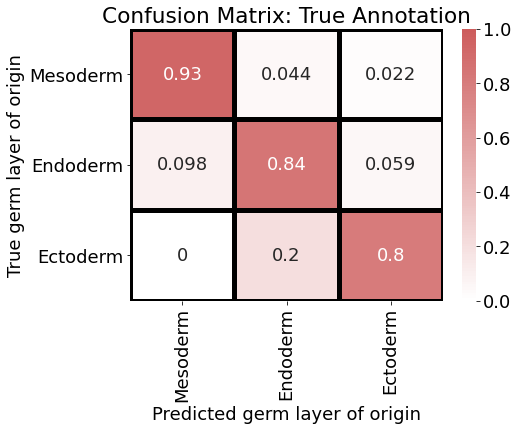

In [36]:
import seaborn
from matplotlib.colors import LinearSegmentedColormap

plot_df = get_confusion_mat(predictions)

plt.figure(figsize=[7,5])
# Define a colormap from light pink to indianred
colors = [(1, 1, 1), (0.8039, 0.3608, 0.3608)]
n_bins = [3, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'custom_div_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

seaborn.heatmap(data=plot_df, linewidths=5, linecolor='black' , 
                 annot=True, fmt='.2g',
                cbar='hot_r', cmap=cm, vmin=0,vmax=1)

plt.xticks([0.5,1.5,2.5], ['Mesoderm', 'Endoderm', 'Ectoderm'], rotation=90)
plt.yticks([0.5,1.5,2.5], ['Mesoderm', 'Endoderm', 'Ectoderm'], rotation=0)

plt.ylabel('True germ layer of origin')
plt.xlabel('Predicted germ layer of origin')
plt.title('Confusion Matrix: True Annotation')


Text(0.5, 1.0, 'Confusion Matrix: Coarse Annotation')

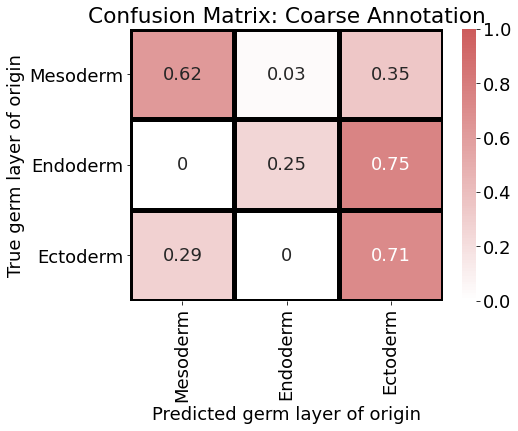

In [37]:
import seaborn
from matplotlib.colors import LinearSegmentedColormap

plot_df = get_confusion_mat(predictions_coarse)

plt.figure(figsize=[7,5])
# Define a colormap from light pink to indianred
colors = [(1, 1, 1), (0.8039, 0.3608, 0.3608)]
n_bins = [3, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'custom_div_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

seaborn.heatmap(data=plot_df, linewidths=5, linecolor='black' , 
                 annot=True, fmt='.2g',
                cbar='hot_r', cmap=cm, vmin=0,vmax=1)

plt.xticks([0.5,1.5,2.5], ['Mesoderm', 'Endoderm', 'Ectoderm'], rotation=90)
plt.yticks([0.5,1.5,2.5], ['Mesoderm', 'Endoderm', 'Ectoderm'], rotation=0)

plt.ylabel('True germ layer of origin')
plt.xlabel('Predicted germ layer of origin')
plt.title('Confusion Matrix: Coarse Annotation')
